In [6]:
from sqlalchemy import create_engine
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

db_connection_url = f"postgresql://{os.getenv('DB_USERNAME')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
engine = create_engine(db_connection_url)

# using SQLAlchemy to read the data directly from the database
with engine.connect() as connection:
    result = connection.execute("SELECT * FROM grammy_awards")
    grammy_df = pd.DataFrame(result.fetchall(), columns=result.keys())

grammy_df_head = grammy_df.head()

grammy_df_info = grammy_df.info()

(grammy_df_head, grammy_df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4810 non-null   object
 6   artist        4810 non-null   object
 7   workers       4810 non-null   object
 8   img           4810 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


(   year                              title               published_at  \
 0  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 1  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 2  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 3  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 4  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 
                   updated_at            category     nominee         artist  \
 0  2020-05-19T05:10:28-07:00  Record Of The Year     Bad Guy  Billie Eilish   
 1  2020-05-19T05:10:28-07:00  Record Of The Year     Hey, Ma       Bon Iver   
 2  2020-05-19T05:10:28-07:00  Record Of The Year     7 rings  Ariana Grande   
 3  2020-05-19T05:10:28-07:00  Record Of The Year  Hard Place         H.E.R.   
 4  2020-05-19T05:10:28-07:00  Record Of The Year        Talk         Khalid   
 
                                              workers  \
 0  Finneas O'C

| Columna | Descripción |
|---|---|
| year | Año en que se otorgó el premio. |
| title | Título de la ceremonia de premiación. |
| published_at | Fecha de publicación de los resultados. |
| updated_at | Fecha de la última actualización de los datos. |
| category | Categoría del premio. |
| nominee | Nombre de la obra o persona nominada. |
| artist | Artista o grupo que recibió la nominación. |
| workers | Personas que contribuyeron a la obra nominada. |
| img | Enlace a la imagen relacionada con la nominación. |
| winner | Indica si la nominación resultó ganadora (True = ganador, False = no ganador). |


In [7]:
category_counts = grammy_df['category'].value_counts().head(10)
print(category_counts)


category
Song Of The Year                  70
Record Of The Year                69
Album Of The Year                 66
Best Opera Recording              64
Best Album Notes                  63
Best Country Song                 55
Best Instrumental Composition     55
Best New Artist                   51
Best Historical Album             44
Best Chamber Music Performance    43
Name: count, dtype: int64


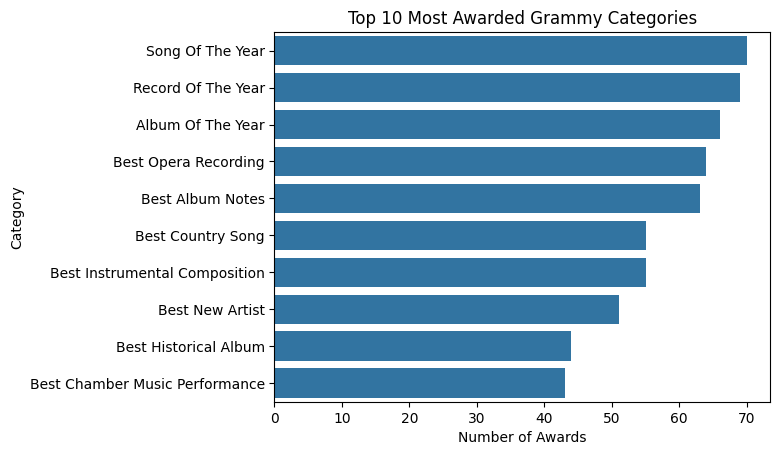

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Most Awarded Grammy Categories')
plt.xlabel('Number of Awards')
plt.ylabel('Category')
plt.show()


year
2019    433
2007    111
2008    111
2006    110
2010    109
       ... 
1968     40
1962     39
1960     39
1959     35
1958     28
Name: count, Length: 62, dtype: int64


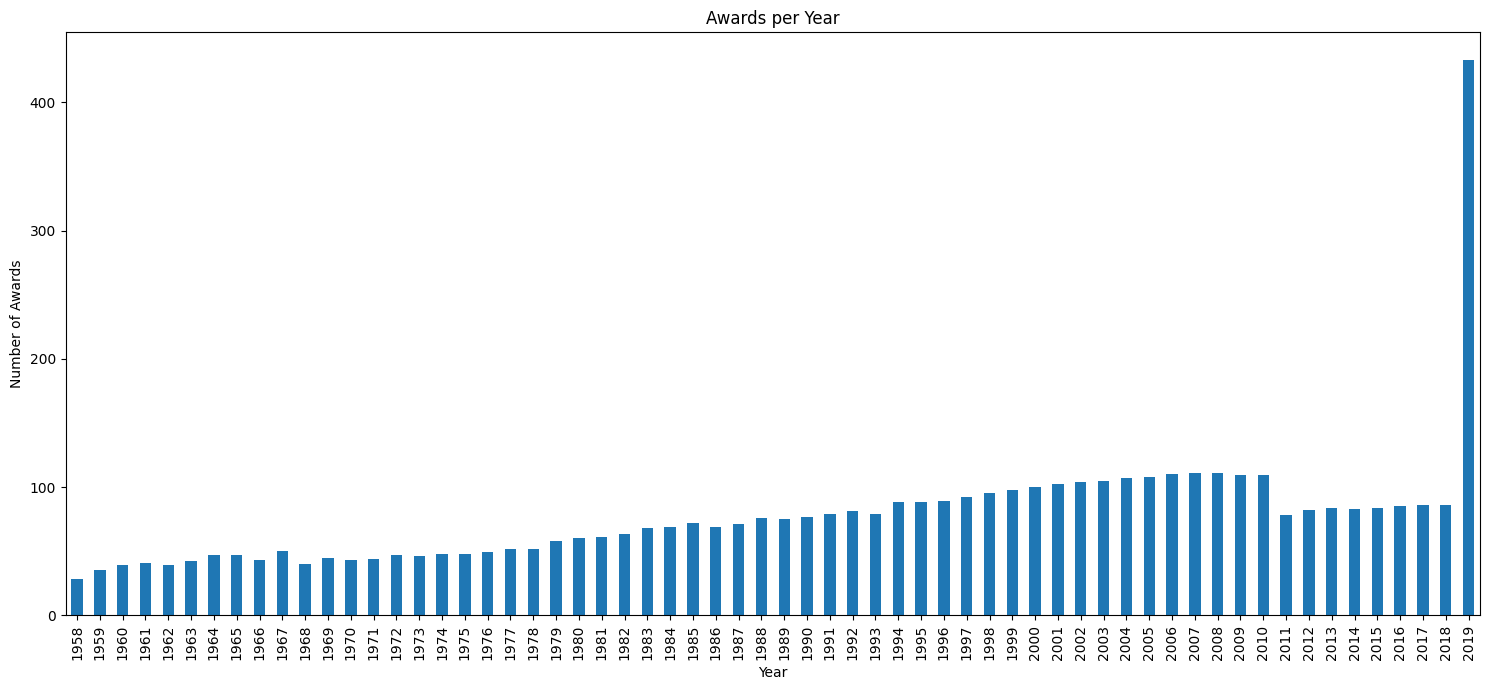

In [9]:
# Count awards per year to identify any unusual spikes
awards_per_year = grammy_df['year'].value_counts()
print(awards_per_year)

awards_per_year.sort_index().plot(kind='bar', figsize=(15, 7))  #
plt.title('Awards per Year')
plt.xlabel('Year')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

The majority of the data (awards per year), comprising 433 entries, is from 2019.

In [10]:
top_nominees = grammy_df['nominee'].value_counts().head(10)
top_artists = grammy_df[grammy_df['winner'] == True]['artist'].value_counts().head(10)

print("Top Nominees:\n", top_nominees)
print("Top Winning Artists:\n", top_artists)

Top Nominees:
 nominee
Berlioz: Requiem              7
Bridge Over Troubled Water    7
Steven Epstein                7
Robert Woods                  7
Up, Up And Away               6
Britten: War Requiem          6
Desconocido                   6
David Frost                   6
A Taste Of Honey              6
Berlioz: Les Troyens          5
Name: count, dtype: int64
Top Winning Artists:
 artist
Desconocido          1840
(Various Artists)      66
U2                     18
Aretha Franklin        16
Ella Fitzgerald        13
Bruce Springsteen      13
Beyoncé                13
Stevie Wonder          13
Tony Bennett           12
Dixie Chicks           12
Name: count, dtype: int64


# Cleaning


**Duplicates**

In [11]:
# Remove duplicates
grammy_df = grammy_df.drop_duplicates()

# Confirm removal
print(f"Duplicates removed, new dataset size: {grammy_df.shape}")

Duplicates removed, new dataset size: (4810, 10)


**Missing Values**

In [12]:
# Check for missing values
print(grammy_df.isnull().sum())

# For categorical data, you might use a placeholder like 'Unknown'
grammy_df.fillna('Unknown', inplace=True)


year            0
title           0
published_at    0
updated_at      0
category        0
nominee         0
artist          0
workers         0
img             0
winner          0
dtype: int64


**Fields Cleaning**

In [13]:
# Standardizing the 'artist' field
grammy_df['artist'] = grammy_df['artist'].str.title()

# Remove any leading/trailing whitespaces
grammy_df['artist'] = grammy_df['artist'].str.strip()

print(grammy_df['artist'].head())

0    Billie Eilish
1         Bon Iver
2    Ariana Grande
3           H.E.R.
4           Khalid
Name: artist, dtype: object


**Analyze Award Year**

In [14]:
#Ensure 'year' is integer type
grammy_df['year'] = grammy_df['year'].astype(int)  
valid_years = grammy_df['year'].between(1958, 2024)
grammy_df = grammy_df[valid_years]

**Inspect Categorical Values**

In [15]:
# Standardize category names to lower case and strip extra whitespace
grammy_df['category'] = grammy_df['category'].str.lower().str.strip()
print(grammy_df['category'].unique())  # Check for inconsistencies

['record of the year' 'album of the year' 'song of the year'
 'best new artist' 'best pop solo performance'
 'best pop duo/group performance' 'best traditional pop vocal album'
 'best pop vocal album' 'best dance recording'
 'best dance/electronic album' 'best contemporary instrumental album'
 'best rock performance' 'best metal performance' 'best rock song'
 'best rock album' 'best alternative music album' 'best new age album'
 'best r&b performance' 'best traditional r&b performance' 'best r&b song'
 'best urban contemporary album' 'best r&b album' 'best country song'
 'best rap performance' 'best rap/sung performance' 'best rap song'
 'best rap album' 'best pop gospel album' 'best country solo performance'
 'best country duo/group performance' 'best country album'
 'best improvised jazz solo' 'best jazz vocal album'
 'best jazz instrumental album' 'best large jazz ensemble album'
 'best latin jazz album' 'best gospel performance/song'
 'best contemporary christian music performance/

**Check Unusual Entries**

In [16]:
# Check for short or null entries in 'nominee' and 'artist'
grammy_df['nominee'] = grammy_df['nominee'].fillna('Unknown')
grammy_df['artist'] = grammy_df['artist'].fillna('Unknown')
grammy_df['nominee_length'] = grammy_df['nominee'].str.len()
short_entries = grammy_df[grammy_df['nominee_length'] < 5]  # Assuming 5 as a threshold
print(short_entries)

      year                              title               published_at  \
4     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
9     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
13    2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
31    2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
43    2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
...    ...                                ...                        ...   
4078  1975  18th Annual GRAMMY Awards  (1975)  2017-11-28T00:03:45-08:00   
4388  1968  11th Annual GRAMMY Awards  (1968)  2017-11-28T00:03:45-08:00   
4461  1966   9th Annual GRAMMY Awards  (1966)  2017-11-28T00:03:45-08:00   
4599  1963   6th Annual GRAMMY Awards  (1963)  2017-11-28T00:03:45-08:00   
4801  1958   1st Annual GRAMMY Awards  (1958)  2017-11-28T00:03:45-08:00   

                     updated_at  \
4     2020-05-19T05:10:28-07:00   
9     2020-05-19T

In [17]:
grammy_df.to_csv('../../data/grammy_dataset_cleaned.csv', index=False)